In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("white")

In [11]:
pmi = pd.read_csv ('../../dataset/Indicators/pmi_.csv', encoding='unicode_escape')

In [13]:
pmi.tail()

,time,close
894,2022-07-01T01:00:00+01:04,52.8
895,2022-08-01T01:00:00+01:05,52.8
896,2022-09-01T01:00:00+01:06,50.9
897,2022-10-01T01:00:00+01:07,50.2
898,2022-11-02T01:00:00+01:07,50.0


In [14]:
def cleaned_indicator(df): 
    df['time'] = df['time'].str.extract('(\d{4}-\d{2}-\d{2})', expand=True)
    df['time'] = pd.to_datetime(df["time"])
    df.set_index('time', inplace=True)
    df= df.reindex(pd.date_range(start=df.index.min(),
                                                  end=df.index.max(),
                                                  freq='1D'))
    df.interpolate(method='linear', inplace=True)
    df.index.names = ['Dates']
    df = df[(df.index >= '1976-06-01') & (df.index <= '2022-11-02')]
    return df


In [15]:
pmi = cleaned_indicator(pmi)

In [16]:
def pmi_visualization():
    plt.plot(pmi, color= 'b')
    plt.title('PMI YoY', fontsize= 20)
    plt.xlabel('Years', fontsize= 20)
    plt.ylabel('PMI YoY (%)', fontsize= 20)
    plt.axhline(y=50, color= 'red')
    plt.style.use('seaborn')
    return plt.show()

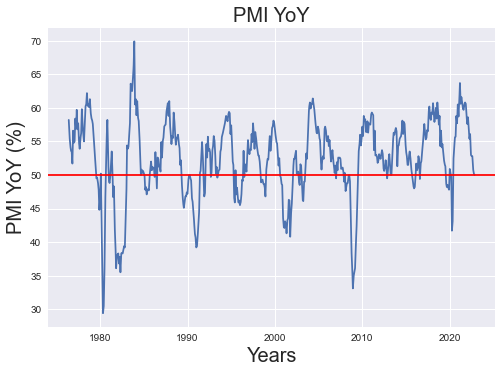

In [18]:
pmi_visualization()

In [19]:
pmi.shape

(16956, 1)